In [36]:
# %load "/home/yggdrasil/University/CEMRACS/horizontal_gene_transfer/Python/Stochastic/stochastic_continuous.py"
import numpy as np
import pandas as pd

T_max = 200 # maximal time 
dT = 0.1 # Discretization time 

K = 1000     # Maximal capacity of the system
N0 = 1000    # Initial number of population
sigma0=0.1  #Initial standard variation of the population
C = 0.5    # competition
p = 0.03      # Probability of mutation
b_r = 4     # birth rate
d_r = 1      # death rate
beta = 0 
mu = 1
sigma = 0.01
tau = 0.6    # transfer rate

X0 = np.random.normal(1, sigma0, N0) # Initial population


X = [None]*int(T_max/dT)  # history of all populations up to time T_max
X[0] = np.sort(X0)

def horizontal_transfer(x):
    # Do transfer in an already sorted list!!!
    # x = x.sort()
    n_tot = len(x)
    ht_rate = tau/(beta+mu*n_tot)
    return list(map(lambda i: ht_rate*(n_tot-i), range(n_tot)))
    


def Next_Generation(x):
    n_tot = x.size
    if n_tot==0:
        return x
    else:
        beta_birth = np.divide(1,np.repeat(b_r, n_tot))
        beta_death = np.divide(1,d_r*x**2 + n_tot*C/K)
        beta_transfer = np.divide(1,horizontal_transfer(x))
        times = np.array([np.random.exponential(beta_birth),np.random.exponential(beta_death), np.random.exponential(beta_transfer)])
        b_mat = (times < dT)

        return np.sort(np.concatenate((x[np.logical_not(np.logical_or(b_mat[1],b_mat[2]))],np.random.normal(loc=x[b_mat[0]], scale=sigma, size=None),np.vectorize(lambda i: np.random.choice(x[(i+1):]),otypes=[np.float64])(np.arange(n_tot)[b_mat[2]][:-1]))))




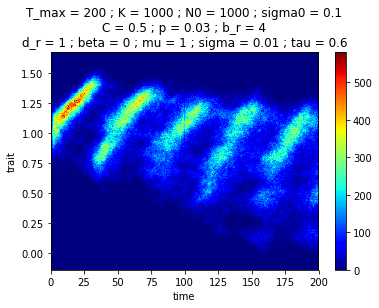

In [37]:
# %load "/home/yggdrasil/University/CEMRACS/horizontal_gene_transfer/Python/Stochastic/Test.py"
#!/usr/bin/env python3
"""
Created on Wed Jul 25 16:10:45 2018

@author: samuelnordmann
"""
import matplotlib.pyplot as plt

Abs=[]   
Ord=[]

for i in range(int(T_max/dT-1)):
    X[i+1]=Next_Generation(X[i])
    for x in X[i]:
        Abs.extend([i*dT])
        Ord.extend([x])


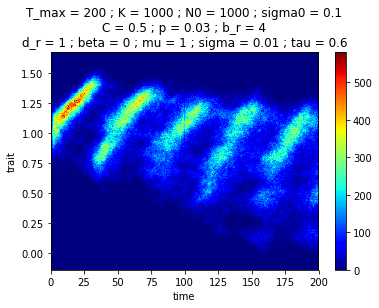

In [50]:
from datetime import datetime
figure = plt.figure()
plt.hist2d(Abs, Ord, bins=K/2, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('time')
plt.ylabel('trait');
titre='T_max = '+str(T_max)+' ; K = '+str(K)+' ; N0 = '+str(N0)+' ; sigma0 = '+str(sigma0)+'\nC = '+str(C)+' ; p = '+str(p)+' ; b_r = '+str(b_r)+'\nd_r = '+str(d_r)+' ; beta = '+str(beta)+' ; mu = '+str(mu)+' ; sigma = '+str(sigma) +' ; tau = '+str(tau)          
plt.title(titre)
plt.show()
current_time = datetime.now().time()
figure.savefig(str("plot_" + str(current_time)[0:8]+".pdf"), bbox_inches='tight')


In [49]:
str(current_time)[0:8]

'11:52:24'